In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Step 1. Image Capture and Preprocessing

• Capture image from webcam or load from disk  
• Convert image to grayscale  
• Reduce noise using Gaussian blur  
• Enhance contrast for better visibility  


In [2]:
#use this for captuiring image from webcam
#  # acquiring image 
# cap=cv2.VideoCapture(0)
# ret,frame=cap.read()
# if ret:
#     cv2.imwrite("acquired_image.jpg",frame)
# cap.release()

In [4]:
import cv2
img = cv2.imread('aquired_image3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Grayscale
blur = cv2.GaussianBlur(gray, (5,5), 0)       # Denoise
equalized = cv2.equalizeHist(blur)            # Contrast enhancement
cv2.imshow('Preprocessed', equalized)
cv2.waitKey(1000)
cv2.destroyAllWindows()
cv2.imwrite('preprocessed.jpg', equalized)    # Save for next


True

## Step 2. Segmentation and ROI

• Load preprocessed grayscale image  
• Apply binary thresholding to separate foreground  
• Extract external contours as regions of interest  
• Draw segmented regions for visualization  


In [14]:
### Segmentation AND ROI
import cv2
img = cv2.imread('preprocessed.jpg', 0)
# Apply binary thresholding with inversion to separate foreground from background
# Pixels >120 become 0, pixels ≤120 become 255
_, thresh = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY+cv2.THRESH_BINARY_INV)  # Binary segmentation
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, contours, -1, (0,255,0), 2)  # Draw segmented regions

cv2.imshow('Segmented', output)
cv2.waitKey(1000)
cv2.destroyAllWindows()
cv2.imwrite('segmented.jpg', output)


True

## Step 3. Feature Extraction

• Load segmented grayscale image  
• Detect keypoints using ORB  
• Compute binary descriptors  
• Visualize key feature locations  


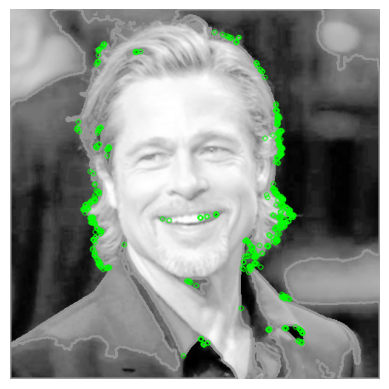

In [15]:
## Feature Extraction
import cv2

img = cv2.imread('segmented.jpg', 0)

orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(img, None)
#norm_img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)


# Draw detected keypoints on the image for visual inspection
# Green markers indicate locations used for feature matching
output = cv2.drawKeypoints(img, keypoints, None, color=(0,255,0))

cv2.imwrite('features.jpg', output) 

#cv2.imshow('Features', output)
plt.imshow(output)
plt.axis('off')
plt.show()
# cv2.waitKey(1000)
# cv2.destroyAllWindows()


## Step 4. Feature Matching

• Load two grayscale images  
• Extract ORB features from both images  
• Match descriptors using Hamming distance  
• Sort and visualize strongest matches  


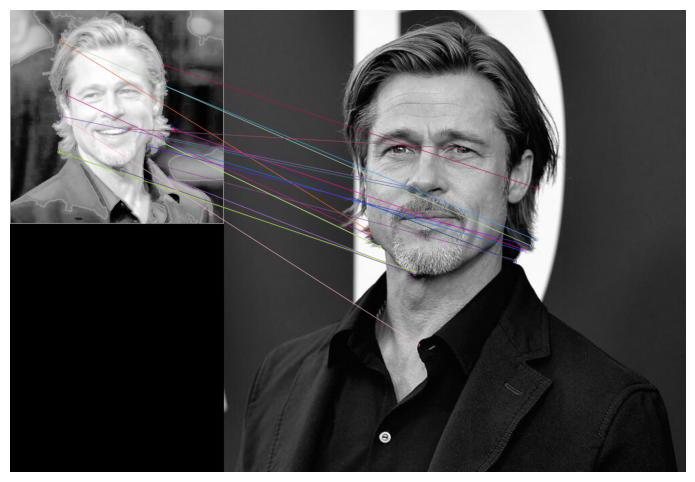

In [ ]:
import cv2
import matplotlib.pyplot as plt

# This code compares two images by finding and visualizing similar visual patterns using ORB feature matching.

img1 = cv2.imread('segmented.jpg', 0)
img2 = cv2.imread('another_image2.jpg', 0)  # existing image

orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create a brute force matcher using Hamming distance for ORB descriptors
# crossCheck ensures one to one consistent matches
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

output = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    matches[:20],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(12,6))
plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()


## Step 5. ML Based Object Classification

• Load segmented image  
• Detect individual objects using contours  
• Extract contour area as a feature  
• Classify objects based on size  
• Visualize classification results  


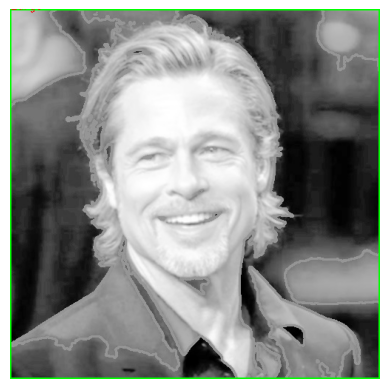

In [ ]:
### ml part 
img = cv2.imread('segmented.jpg', 0)
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    area = cv2.contourArea(cnt)
    label = "Large" if area > 1000 else "Small"  # Simple classification
    cv2.drawContours(output, [cnt], 0, (0,255,0), 2)
    cv2.putText(output, label, (cnt[0][0][0], cnt[0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)
cv2.imshow('Classified', output)
cv2.waitKey(10000)
cv2.destroyAllWindows()
plt.imshow(output)
plt.axis('off')
plt.show()

# This block performs simple object classification by size using contour area as the feature.

## Step 6. Post Processing with Non Maximum Suppression

• Take detected bounding boxes with confidence scores  
• Remove overlapping detections  
• Keep only the most confident object boxes  
• Visualize final cleaned detections  


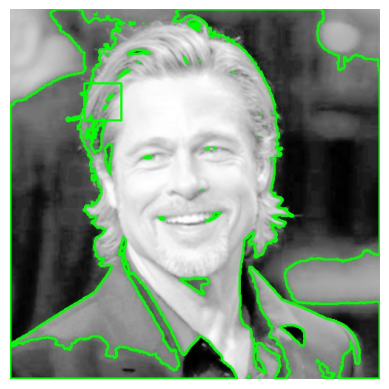

In [ ]:
# This code removes overlapping detections and shows only the most confident object boxes on the image.

import cv2
import numpy as np
# Assume detections: list of [x,y,w,h,score]
detections = np.array([[100,100,50,50,0.9], [105,105,50,50,0.8]])  # Example
indices = cv2.dnn.NMSBoxes(detections[:,:4].tolist(), detections[:,4].tolist(), 0.5, 0.4)
img = cv2.imread('segmented.jpg')
for i in indices:
    x,y,w,h = detections[i,:4].astype(int)
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
cv2.imshow('Post-processed Output', img)
###cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(img)
plt.axis('off')
plt.show()

# Output: Save report or alert (e.g., print("Detected objects: {}".format(len(indices))))
